<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0] #try changing indexes ; 0 stands for black color and 255 stands for white color, other numbers are shades
           #between black and white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

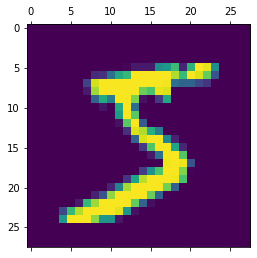

In [7]:
plt.matshow(X_train[0]) #try changing indexes

In [8]:
y_train[0]

5

In [9]:
y_train[:5] #first 5 numbers in y_train

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape #60000 are the number of images, each image has the shape of 28*28 pixels

(60000, 28, 28)

In [11]:
#scaling : to bring all numbers between 0 and 1 cz we have 255 the highest number we are simply deviding it with that
#this is a technique in machine learning to improve the accuracy
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #reshaping the 3 dimensions to 2 dimensions i.e. (60000, 784)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
print(X_train_flattened.shape)

(60000, 784)


In [14]:
X_test_flattened = X_test.reshape(len(X_test), 28*28) #reshaping the 3 dimensions to 2 dimensions i.e. (60000, 784)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
print(X_test_flattened.shape)

(10000, 784)


In [16]:
X_train[0] #two dimensional array has been coverted in to 1 dimensional array to pass to our input neurons, 
            #check below line of code

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
X_train_flattened[0] #here is the converted 1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

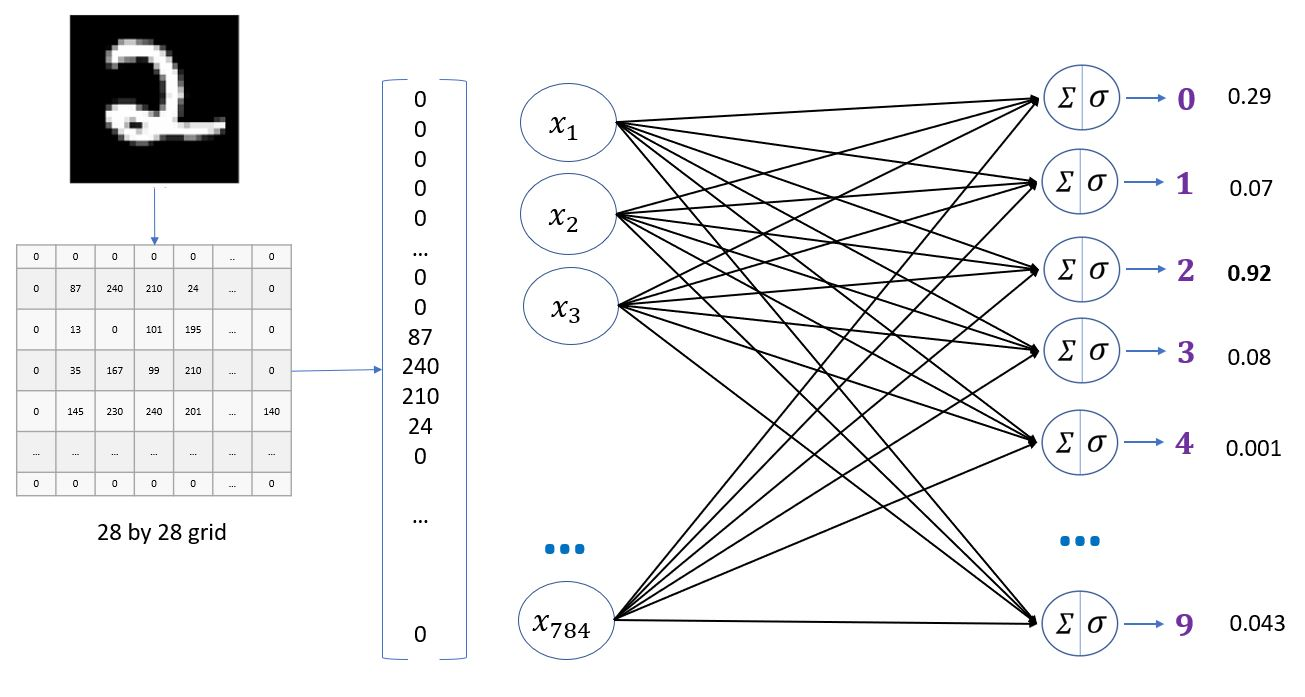

In [18]:
#sequential means every layer in sequense
#Dense means every neuron in a layer is connected to every other neuron in the next layer
#10 is the ouput layer and input_shape is number of input neurons and it is 1D array that's why (784,)
#activation is activation function
#model is our model name
#optimizer, there are different types of optimizers which allows model to reach the global optima ifficiently
#loss is 'sparse_categorical_crossentropy' because we have categorical output and integer input (that's why sparse), it's like 
#we have used MSE or RMSE in Leanier regression

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 909us/step - loss: 0.4689 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 859us/step - loss: 0.2665 - accuracy: 0.9255


interpretation of the accuracy is that those many number of times it will make the accurate predictions

In [19]:
#before deploying model to the production we always have to evaluate it on our test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 904us/step - loss: 0.2680 - accuracy: 0.9251


[0.26802030205726624, 0.9251000285148621]

In [20]:
#our prdiction has 10 values because we have 10 categories, to find the max value among this we will use numpy function below
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
#try changing indexes above and below for next 2 cells to check how our model is prediction for different images

313/313 [==============================] - 0s 760us/step


array([1.8704789e-02, 3.6924055e-07, 4.2132981e-02, 9.6481705e-01,
       2.6746579e-03, 9.6418455e-02, 8.1295076e-07, 9.9976188e-01,
       7.9061605e-02, 6.6466886e-01], dtype=float32)

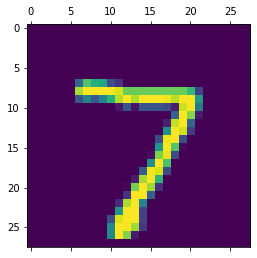

In [32]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [33]:
#it is giving the number present at zero index which we have predicted above by using our model
#9.9976188e-01 is the higest value in above prediction which is located at 7th index starting from 0
np.argmax(y_predicted[0])

7

In [34]:
#we can also use a for loop to see first 5 predictions and in the following code we are using a list comprehension to conver our
#predictions to integers and store in the form of lables, so that we can use them in confusion matrix, as y_predicted is giving
#10 probabilities which need to be classified in real numbers
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
y_predicted_labels[:5] #predicted values

[7, 2, 1, 0, 4]

In [37]:
y_test[:5] #Actual values

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
#Confusion matrix to check correct and wrong prdictions
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    0,    1,    2,    2,    1,    3,    0],
       [   0, 1122,    4,    1,    0,    1,    2,    0,    5,    0],
       [   8,    0, 1002,    3,    3,    1,    1,    5,    9,    0],
       [   0,    0,    1,  998,    0,    0,    0,    5,    2,    4],
       [   3,    0,    1,    1,  963,    0,    3,    0,    1,   10],
       [   2,    0,    0,   15,    2,  862,    1,    1,    5,    4],
       [   7,    3,    1,    1,    8,    6,  927,    0,    5,    0],
       [   2,    4,    7,    6,    2,    0,    0, 1004,    0,    3],
       [   3,    0,    1,    9,    4,    4,    1,    4,  946,    2],
       [   3,    6,    0,    8,   10,    0,    0,    8,    4,  970]])>

Text(69.0, 0.5, 'Truth')

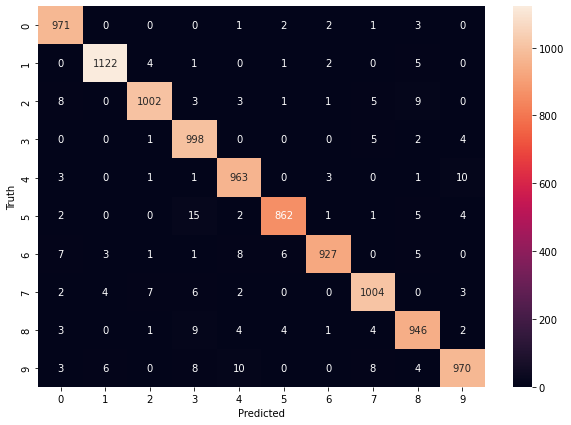

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [39]:
#100 is number of neurons in the hidden layer, this number is sort of hit and try

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #first and only one hidden layer connected to input
    #we can add more hidden layers before the output layers
    keras.layers.Dense(10, activation='sigmoid') #output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2721 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1247 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0534 - accuracy: 0.9838


In [40]:
model.evaluate(X_test_flattened,y_test)
#so, here we can see the improvement in the accuracy after adding a single hidden layer

313/313 [==============================] - 0s 948us/step - loss: 0.0831 - accuracy: 0.9738


[0.08307366073131561, 0.973800003528595]

313/313 [==============================] - 0s 788us/step


Text(69.0, 0.5, 'Truth')

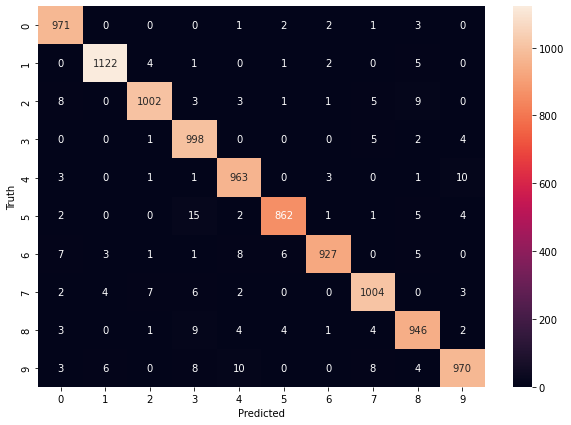

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2719 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1267 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0434 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0235 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9768


[0.08504407852888107, 0.9768000245094299]

# now the assignment for practice is that you have to try with different activation function, loss functions, epochs, may be more hidden layers of different neuron sizes and optimizers


In [43]:
# for above you can use the tenserflow documentation and do some research